In [26]:
# %matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected = True)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# plotting parameters
grey = "#21201F"
green = "#9AC529"
lblue = "#42B9B2"
pink = "#DE237B"
orange = "#F38A31"

nt_colors = [green, lblue, pink, orange]

plt.style.use("ggplot")
fig_width = 12  # width in inches
fig_height = 9  # height in inches
fig_size = [fig_width, fig_height]
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.autolayout"] = True

sns.set(
    style="white",
    context="notebook",
    font_scale=1,
    rc={
        "axes.labelcolor": grey,
        "text.color": grey,
        "axes.edgecolor": grey,
        "xtick.color": grey,
        "ytick.color": grey,
    },
)

sns.set_palette(sns.color_palette
(nt_colors))

# Load data

In [261]:
def symbol_fun(x):
    if  x== 'p < 0.05 FDR corrected':
        symbols = 'hexagram' 
    elif x == 'p < 0.05 uncorrected':
        symbols = 'circle'
    else:
        symbols = 'circle-open'
            
    return symbols

In [264]:
df_markers = pd.read_csv('Data/all_markers.csv')

svm_mind = pd.read_csv('Data/univariate_roc_mind_segment.csv')
aucs_mind = svm_mind.groupby('markers', as_index= False).agg({'AUC':'mean', 'significant':'first'}).assign(symbol = lambda df: df.significant.apply(symbol_fun))

svm_mw = pd.read_csv('Data/univariate_roc_mw_segment.csv')
aucs_mw = svm_mw.groupby('markers', as_index= False).agg({'AUC':'mean', 'significant':'first'}).assign(symbol = lambda df: df.significant.apply(symbol_fun))

In [252]:
significant_mind = aucs_mind.query("significant == 'Signficant'").markers.to_list()
significant_mw = aucs_mw.query("significant == 'Signficant'").markers.to_list()

significant_markers = significant_mind + significant_mw

In [253]:
df_mind = (
    df_markers
    .query("probe == 'PC'")
    .assign(
    mind2 = lambda df: np.where(df.mind == 'on-task', 'on-task', 'mw'))
    .groupby(['mind2'], as_index = False).mean()
).melt(id_vars = ['mind2'], var_name = 'markers', value_name = 'val')

df_mw = (
    df_markers
    .query("probe == 'SC'")
    .query("mind != 'on-task'")
    .groupby(['mind'], as_index =False).mean()
).melt(id_vars = ['mind'], var_name = 'markers', value_name = 'val')


In [254]:
markers = ['wSMI_1', 'wSMI_2', 'wSMI_4', 'wSMI_8', 'p_e_1', 'p_e_2',
       'p_e_4', 'p_e_8', 'k', 'b', 'b_n', 'g', 'g_n', 't', 't_n',
       'd', 'd_n', 'a_n', 'a', 'CNV', 'P1', 'P3a', 'P3b']
erps =['CNV', 'P1', 'P3a', 'P3b']
freqs = ['d','t','a', 'b','g']
freqs_n = ['d_n','t_n','a_n', 'b_n','g_n']
wsmi = ['wSMI_1', 'wSMI_2', 'wSMI_4', 'wSMI_8',]
p_e = [ 'p_e_1', 'p_e_2','p_e_4', 'p_e_8',]

types_markers = [erps, freqs, freqs_n, wsmi, p_e]

In [255]:
def symbol_fun(markers, significants):
    symbols = []
    for marker in markers:
        if marker in significants:
            symbols.append('hexagram')
        else:
            symbols.append('circle-open')
    return symbols

# Significant polar plots

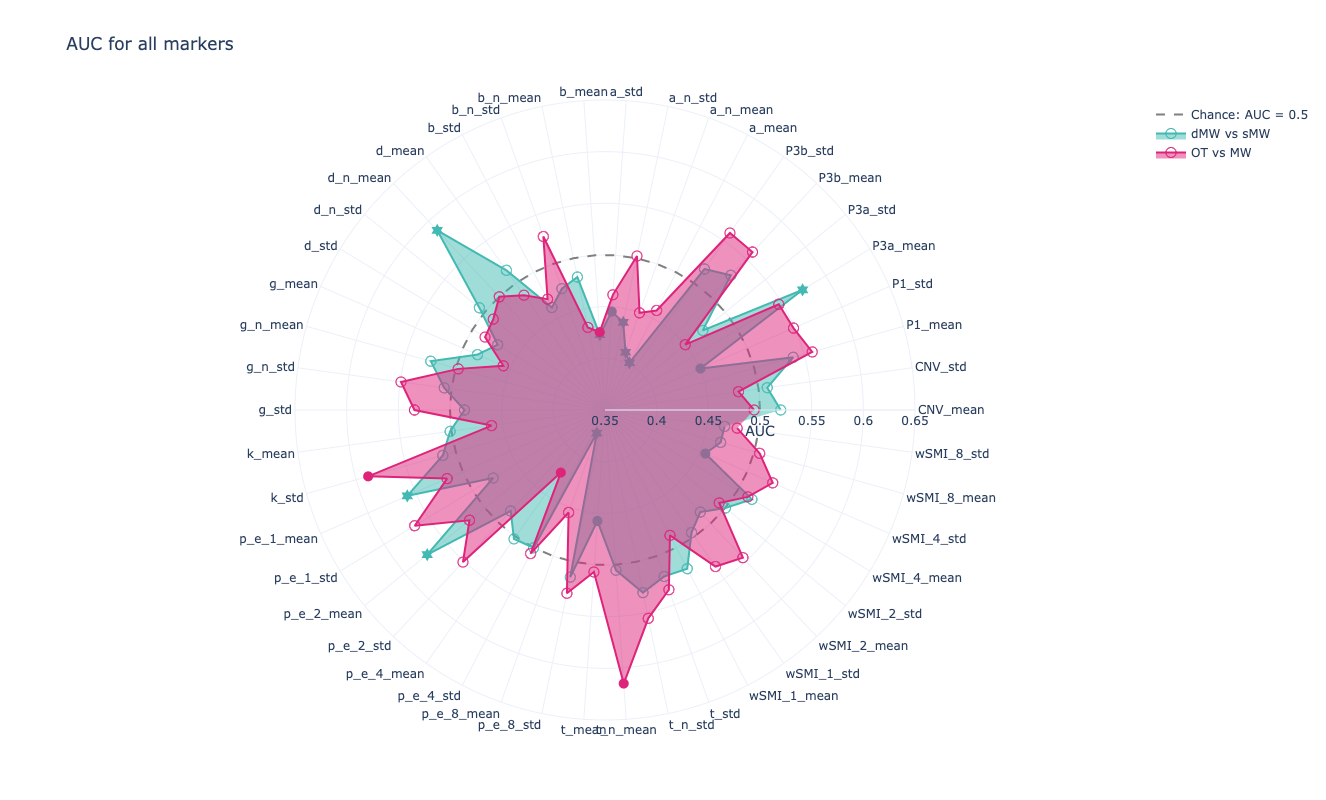

In [265]:
mw =aucs_mw
mind =aucs_mind

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=np.ones(len(mind['markers'])) * 0.5,
    theta=mind['markers'],
    name = 'Chance: AUC = 0.5',
    mode = 'lines',
    line = {'color':'grey', 'width': 2, 'dash': 'dash' },
))


fig.add_trace(go.Scatterpolar(
    r=mw.AUC,
    theta=mw['markers'],
    fill='toself',
    name='dMW vs sMW',
    mode = 'lines+markers',
    marker = {'color':lblue, 'size': 10},
    marker_symbol= mw.symbol.to_list()
))

fig.add_trace(go.Scatterpolar(
    r=mind.AUC,
    theta=mind['markers'],
    fill='toself',
    name='OT vs MW',
    mode = 'lines+markers',
    marker = {'color':pink, 'size': 10},
    marker_symbol= mind.symbol.to_list()
))



fig.update_layout(
    title="AUC for all markers",
#     legend_title="Classification",
    width=800,
    height=800,
    template = 'plotly_white',
    
  polar=dict(
    radialaxis=dict(
    title = 'AUC',
      visible=True,
        range = [0.35,0.65]
    ),
  ),
    
  showlegend=True
)

fig.show()
pio.write_json(fig, 'Figs/radar_auc_all.plotly')

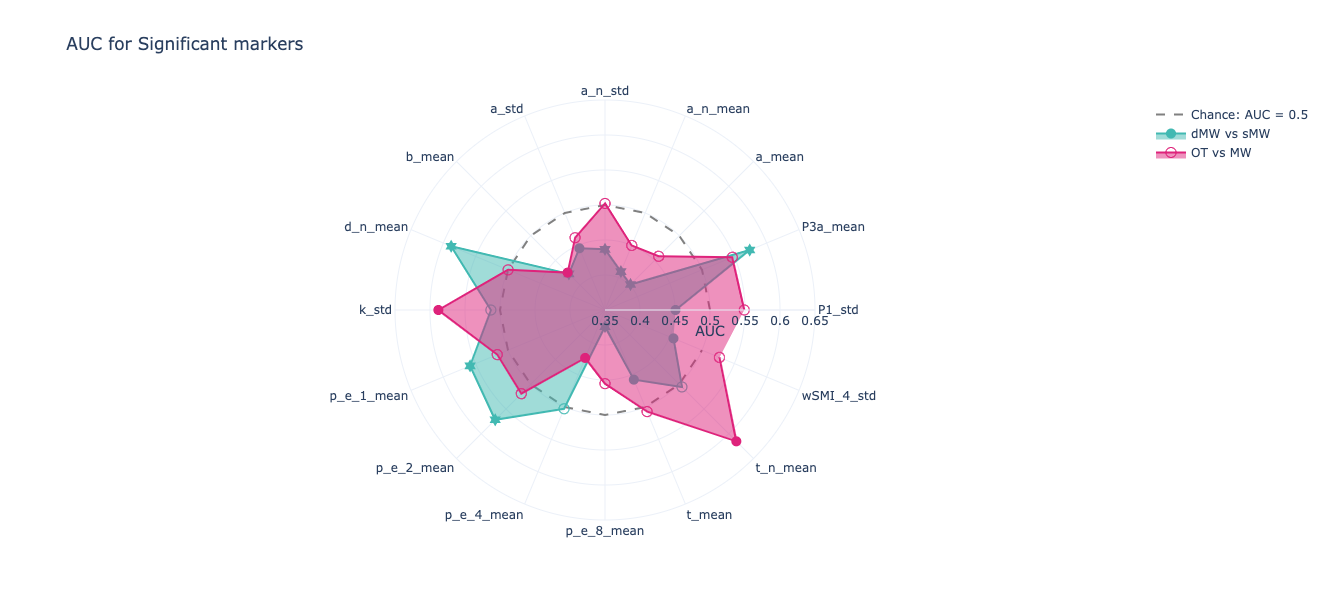

In [266]:
mw =aucs_mw[aucs_mw['markers'].isin([i for i in signficant_markers])]
mind =aucs_mind[aucs_mind['markers'].isin([i for i in signficant_markers])]

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
    r=np.ones(len(mind['markers'])) * 0.5,
    theta=mind['markers'],
    name = 'Chance: AUC = 0.5',
    mode = 'lines',
    line = {'color':'grey', 'width': 2, 'dash': 'dash' },
))

fig.add_trace(go.Scatterpolar(
    r=mw.AUC,
    theta=mw['markers'],
    fill='toself',
    name='dMW vs sMW', 
    marker = {'color':lblue, 'size': 10},
    marker_symbol= mw.symbol.to_list()
))

fig.add_trace(go.Scatterpolar(
    r=mind.AUC,
    theta=mind['markers'],
    fill='toself',
    name='OT vs MW',
    marker = {'color':pink, 'size': 10},
    marker_symbol= mind.symbol.to_list()
))


fig.update_layout(
    title="AUC for Significant markers",
#     legend_title="Classification",
    width=600,
    height=600,
    template = 'plotly_white',
    
  polar=dict(
    radialaxis=dict(
    title = 'AUC',
      visible=True,
        range = [0.35,0.65]
    ),
  ),
    
  showlegend=True
)

fig.show()
pio.write_json(fig, 'Figs/radar_auc_significant.plotly')

# Radar plots for all type of markers

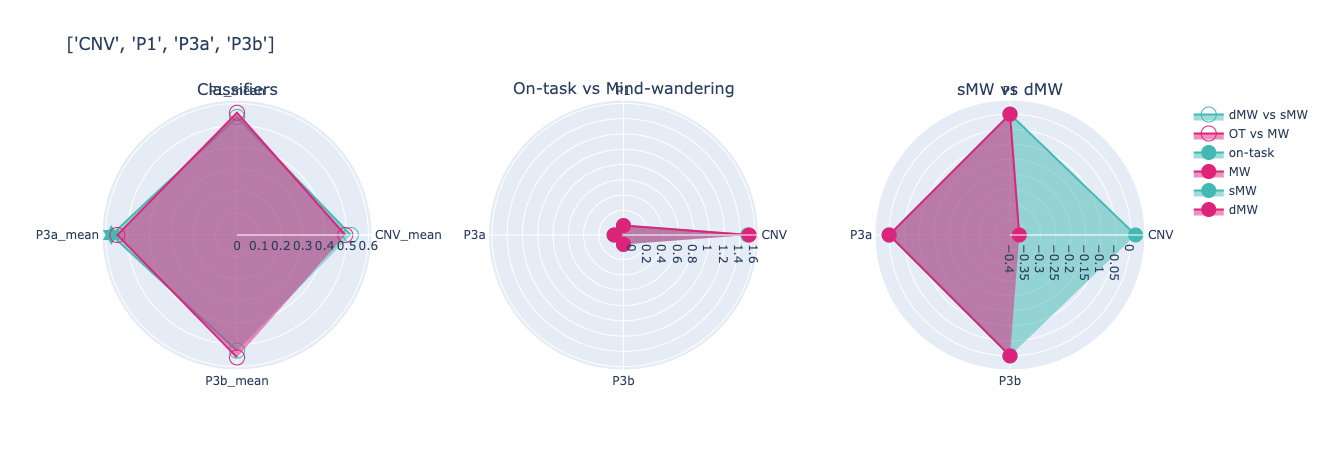

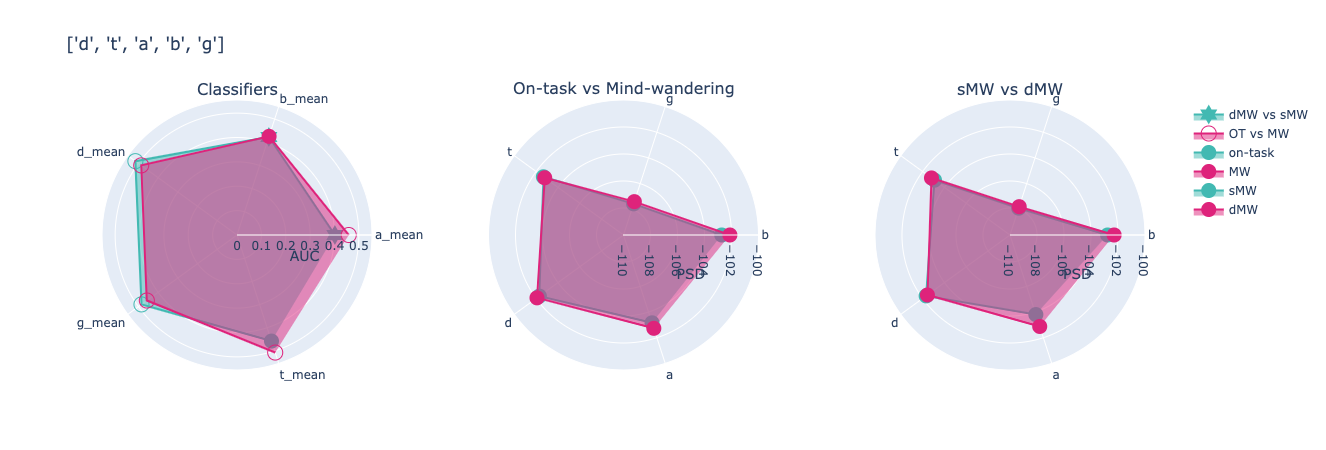

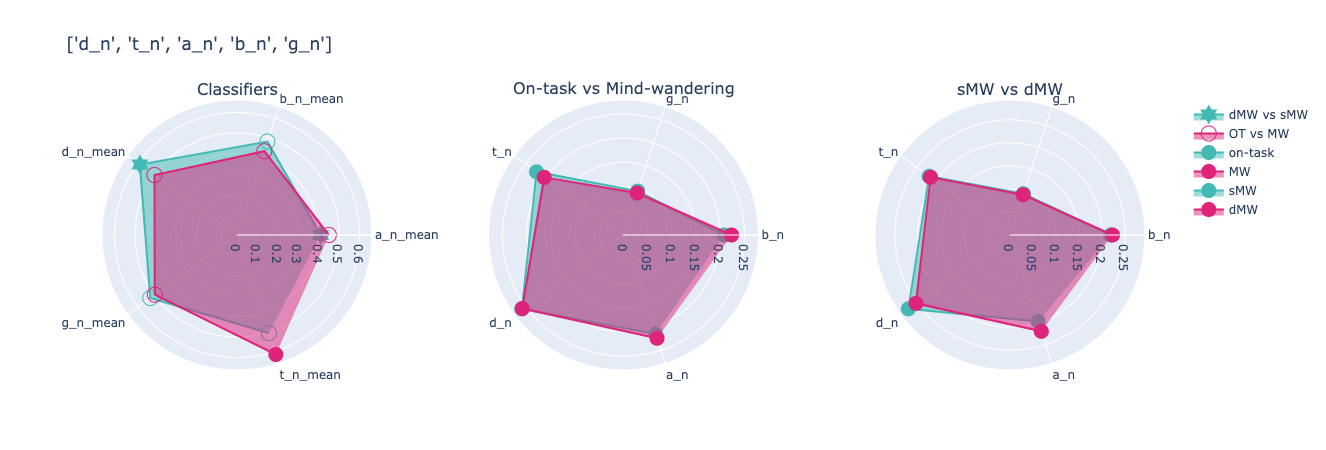

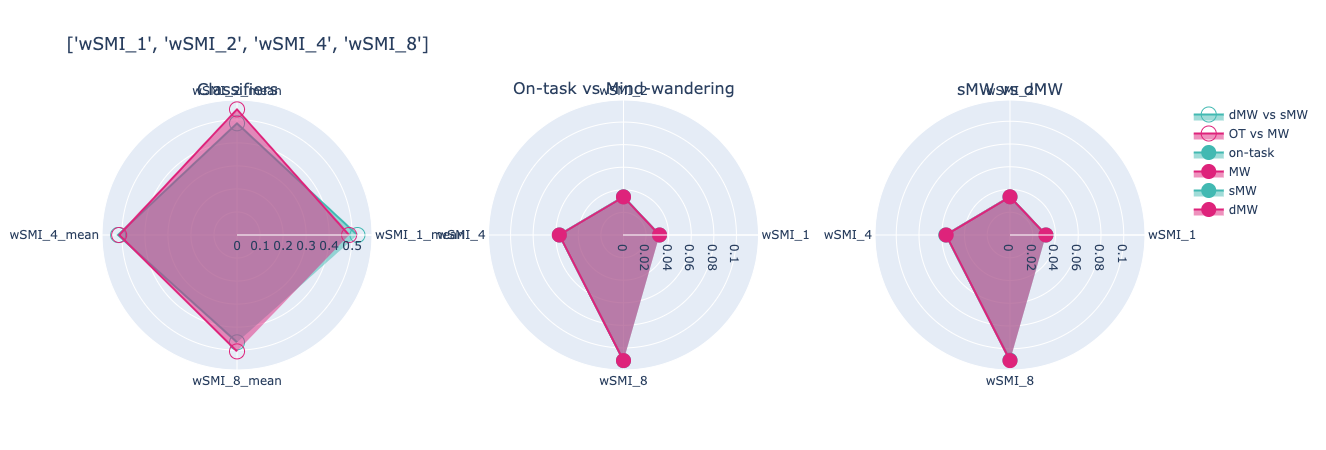

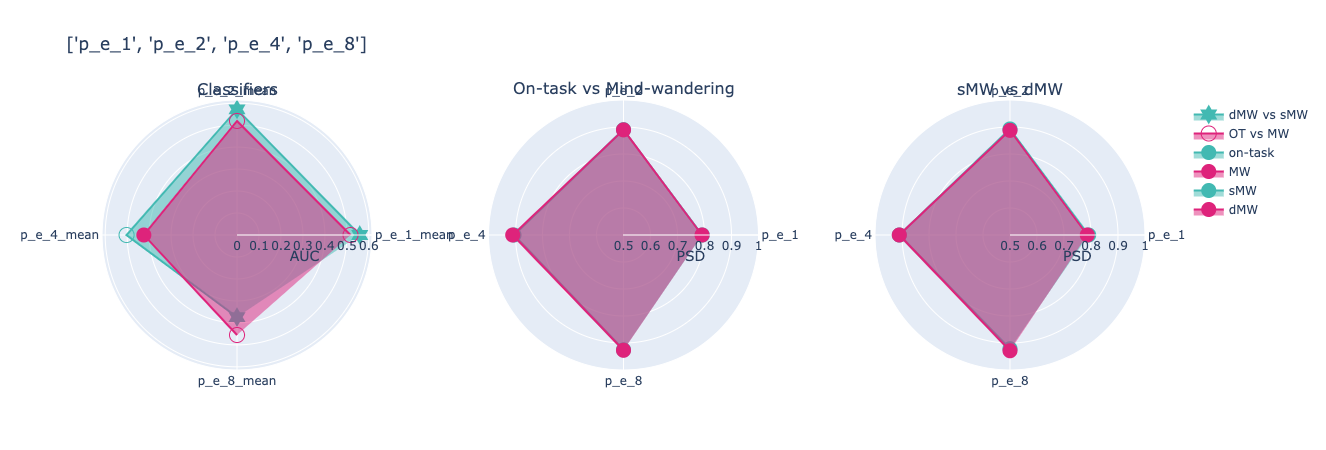

In [267]:
for i in types_markers:
    marker = i
    smw  = df_mw.query("mind == 'sMW'")
    smw = smw[smw['markers'].isin([i for i in marker])]
    dmw  = df_mw.query("mind == 'dMW'")
    dmw = dmw[dmw['markers'].isin([i for i in marker])]
    MW  = df_mind.query("mind2 == 'mw'")
    MW = MW[MW['markers'].isin([i for i in marker])]
    ot  = df_mind.query("mind2 == 'on-task'")
    ot = ot[ot['markers'].isin([i for i in marker])]
    mw =aucs_mw[aucs_mw['markers'].isin([i+'_mean' for i in marker])]
    mind =aucs_mind[aucs_mind['markers'].isin([i+'_mean' for i in marker])]


    fig = make_subplots(rows=1, cols=3, 
                        subplot_titles = ['Classifiers', 'On-task vs Mind-wandering','sMW vs dMW'],
                        specs=[[{"type": "scatterpolar"}, {"type": "polar"}, {"type": "polar"}]])

    fig.add_trace(go.Scatterpolar(
        r=mw.AUC,
        theta=mw['markers'],
        fill='toself',
        name='dMW vs sMW', 
        marker = {'color':lblue, 'size': 15},
        marker_symbol= mw.symbol.to_list()
    ),
        row = 1, col = 1)

    fig.add_trace(go.Scatterpolar(
        r=mind.AUC,
        theta=mind['markers'],
        fill='toself',
        name='OT vs MW',
        marker = {'color':pink, 'size': 15},
        marker_symbol= mind.symbol.to_list()
    ),
        row = 1, col = 1)

    fig.add_trace(go.Scatterpolar(
        r=ot.val,
        theta=ot['markers'],
        fill='toself',
        name='on-task', 
        marker = {'color':lblue, 'size': 15},
    #     marker_symbol= symbol_fun(dmw['markers'])
    ),
        row = 1, col = 2)

    fig.add_trace(go.Scatterpolar(
        r=MW.val,
        theta=MW['markers'],
        fill='toself',
        name='MW',
        marker = {'color':pink, 'size': 15},
    #     marker_symbol= 'symbol_fun(smw['markers'])'
    ),
        row = 1, col = 2)

    fig.add_trace(go.Scatterpolar(
        r=smw.val,
        theta=dmw['markers'],
        fill='toself',
        name='sMW', 
        marker = {'color':lblue, 'size': 15},
    #     marker_symbol= symbol_fun(dmw['markers'])
    ),
        row = 1, col = 3)

    fig.add_trace(go.Scatterpolar(
        r=dmw.val,
        theta=dmw['markers'],
        fill='toself',
        name='dMW',
        marker = {'color':pink, 'size': 15},
    #     marker_symbol= symbol_fun(smw['markers'])
    ),
        row = 1, col = 3)
    
    if marker == freqs:
        fig.update_polars(radialaxis= {'title': 'AUC',}, row=1, col=1)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[-110, -100]}, row=1, col=2)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[-110, -100]}, row=1, col=3)
    elif marker == p_e:
        fig.update_polars(radialaxis= {'title': 'AUC',}, row=1, col=1)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[0.5, 1]}, row=1, col=2)
        fig.update_polars(radialaxis= {'title': 'PSD','range':[0.5, 1]}, row=1, col=3)

    fig.update_layout(
        title=f"{marker}",
    #     width=500,
    #     height=500,

        polar=dict(
        radialaxis=dict(
          visible=True,

        ),
      ),

    )

    fig.show()
#     pio.write_json(fig, 'Figs/radar_auc_freq_n.plotly')

# Scatter

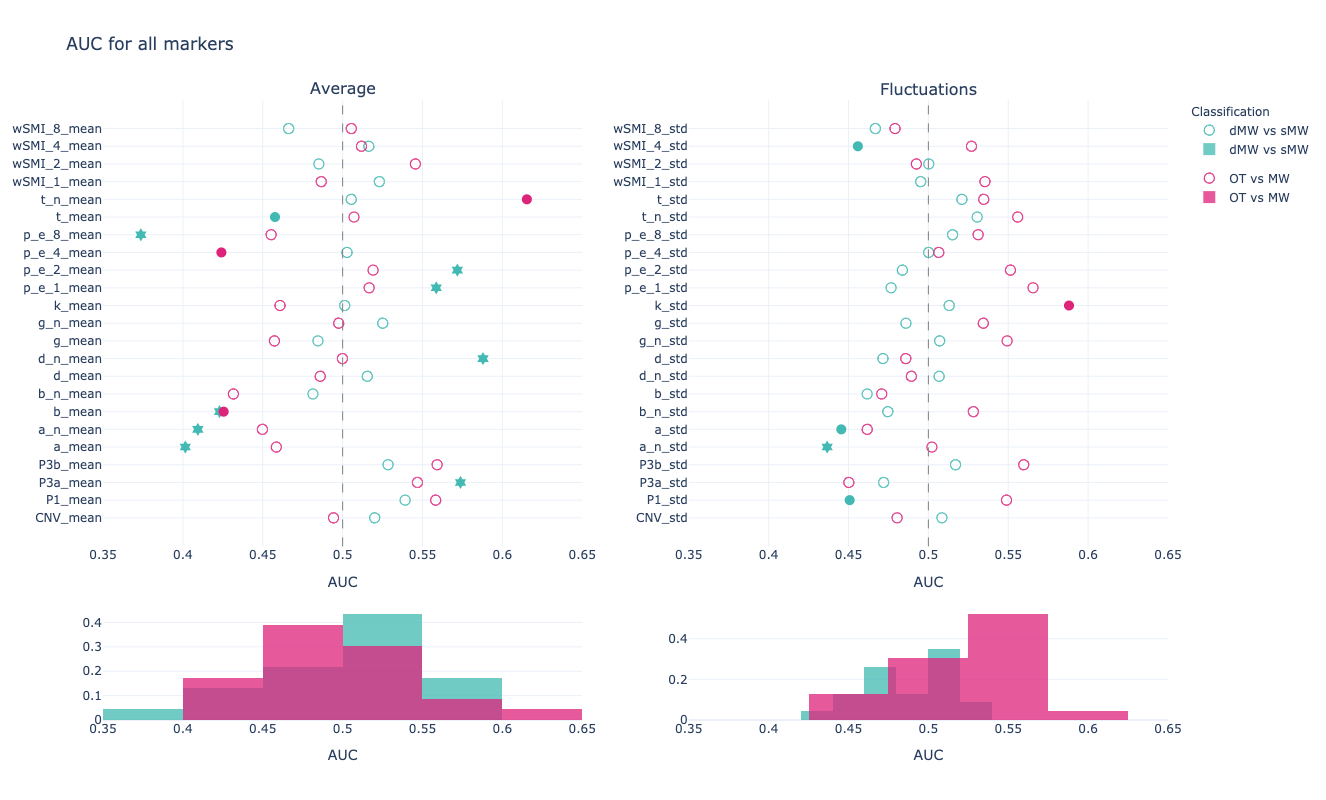

In [310]:
mind_average =aucs_mind[aucs_mind['markers'].isin([i+'_mean' for i in markers])]
mw_average =aucs_mw[aucs_mw['markers'].isin([i+'_mean' for i in markers])]

mind_fluctuations =aucs_mind[aucs_mind['markers'].isin([i+'_std' for i in markers])]
mw_fluctuations =aucs_mw[aucs_mw['markers'].isin([i+'_std' for i in markers])]

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles = ['Average', 'Fluctuations'],
                    specs=[[{"type": "scatter"}, {"type": "scatter"}], [{"type": "histogram"}, {"type": "histogram"}]],
                       column_widths=[0.5, 0.5],
    row_heights=[0.8, 0.2],
                   vertical_spacing = 0.1)

fig.add_trace(go.Scatter(
    x=mw_average.AUC,
    y=mw_average['markers'],
    name='dMW vs sMW',
    legendgroup= 'group1',
    showlegend=True,
    mode = 'markers',
    marker = {'color':lblue, 'size': 10},
    marker_symbol= mw_average.symbol.to_list()
))
fig.add_vline(x=0.5, line_width=1, line_dash="dash", line_color="grey", row = 1, col = 1)
fig.add_trace(go.Scatter(
    x=mind_average.AUC,
    y=mind_average['markers'],
    name='OT vs MW',
    legendgroup= 'group2',
    showlegend=True,
    mode = 'markers',
    marker = {'color':pink, 'size': 10},
    marker_symbol= mind_average.symbol.to_list()
))

fig.add_trace(go.Histogram(
    x=mw_average.AUC,histnorm='probability',
    marker = {'color':lblue},
    name='dMW vs sMW',
    legendgroup= 'group1',    showlegend=True,
),row = 2, col = 1)

fig.add_trace(go.Histogram(
    x=mind_average.AUC,histnorm='probability',
    marker = {'color':pink}, 
    name='OT vs MW',    legendgroup= 'group2',
    showlegend=True,
    autobinx = False,
),row = 2, col = 1)

fig.update_traces(opacity=0.75, row = 2, col=1)





fig.add_trace(go.Scatter(
    x=mw_fluctuations.AUC,
    y=mw_fluctuations['markers'],
    name='dMW vs sMW',
    legendgroup= 'group1',    showlegend=False,
    mode = 'markers',
    marker = {'color':lblue, 'size': 10},
    marker_symbol= mw_fluctuations.symbol.to_list()
),
    row = 1, col = 2)

fig.add_trace(go.Scatter(
    x=mind_fluctuations.AUC,
    y=mind_fluctuations['markers'],
    name='OT vs MW',    legendgroup= 'group2',
    showlegend=False,
    mode = 'markers',
    marker = {'color':pink, 'size': 10},
    marker_symbol= mind_fluctuations.symbol.to_list()
),
    row = 1, col = 2)
fig.add_vline(x=0.5, line_width=1, line_dash="dash", line_color="grey", row = 1, col = 2)

fig.add_trace(go.Histogram(
    x=mw_fluctuations.AUC,histnorm='probability',
    name='dMW vs sMW',
    legendgroup= 'group1',    showlegend=False,
    marker = {'color':lblue},
),row = 2, col = 2)

fig.add_trace(go.Histogram(
    x=mind_fluctuations.AUC,histnorm='probability',
    marker = {'color':pink}, 
    name='OT vs MW',    legendgroup= 'group2',
    showlegend=False,
    autobinx = False,
),row = 2, col = 2)

fig.update_traces(opacity=0.75, row = 2, col=2)
# Update xaxis properties
fig.update_xaxes(title_text="AUC", range=[.35, .65],row=1, col=1)
fig.update_xaxes(title_text="AUC", range=[.35,.65], row=1, col=2)
fig.update_xaxes(title_text="AUC", range=[.35, .65],row=2, col=2)
fig.update_xaxes(title_text="AUC", range=[.35, .65],row=2, col=1)



fig.update_layout(
    title="AUC for all markers",
    legend_title="Classification",
    width=1200,
    height=800,    
    yaxis = {
            'showticklabels': True,
            'tickmode': 'linear',
        },
    barmode='overlay',
  showlegend=True,
    template = 'plotly_white'
)

fig.show()
pio.write_json(fig, 'Figs/scatter_auc_all.plotly')

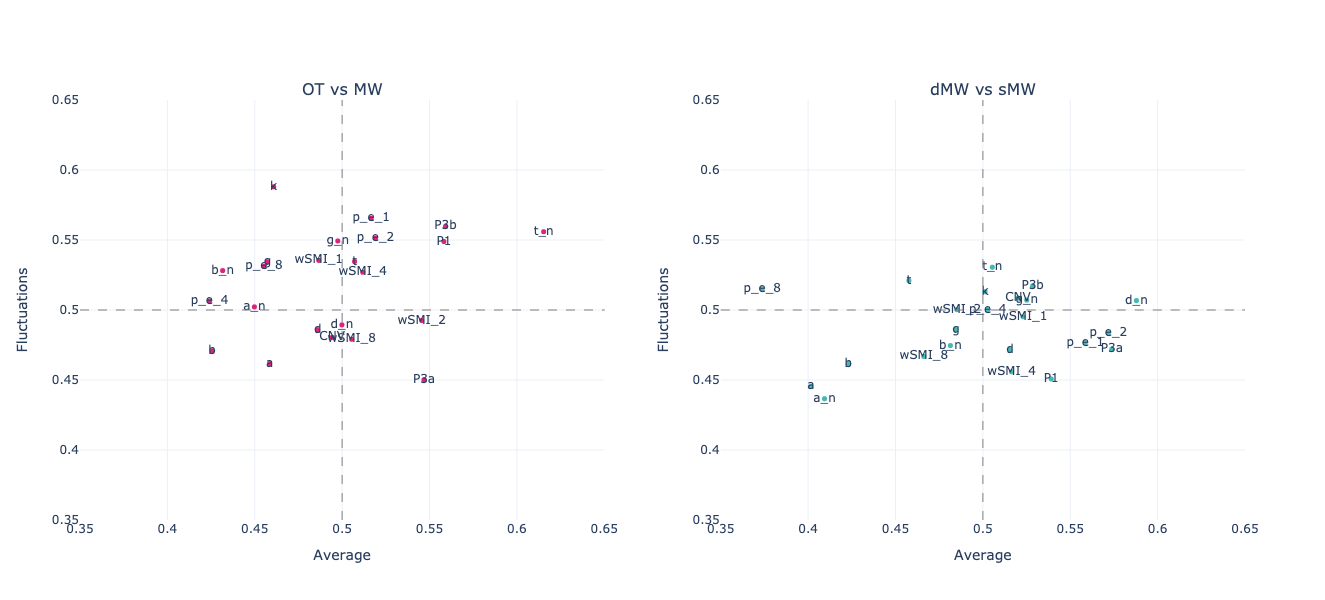

In [311]:
mind = mind_average.assign(marker = lambda df: df['markers'].str.replace('_mean', '')).merge(
mind_fluctuations.assign(marker = lambda df: df['markers'].str.replace('_std', '')), on = 'marker', how = 'inner'
)
mw = mw_average.assign(marker = lambda df: df['markers'].str.replace('_mean', '')).merge(
mw_fluctuations.assign(marker = lambda df: df['markers'].str.replace('_std', '')), on = 'marker', how = 'inner'
)

fig = make_subplots(rows=1, cols=2, 
                    subplot_titles = ['OT vs MW', 'dMW vs sMW'],
                    specs=[[{"type": "scatter"}, {"type": "scatter"}]])

fig.add_trace(go.Scatter(
    x=mind.AUC_x,
    y=mind.AUC_y,
    text = mind.marker,
    mode = 'markers+text',
    marker = {'color':pink, 'size': 5},
#     marker_symbol= symbol_fun(mind, significant_mw)
    
))
fig.add_vline(x=0.5, line_width=1, line_dash="dash", line_color="grey", row = 1, col = 1)
fig.add_hline(y=0.5, line_width=1, line_dash="dash", line_color="grey", row = 1, col = 1)



fig.add_trace(go.Scatter(
    x=mw.AUC_x,
    y=mw.AUC_y,
    text = mw.marker,
    mode = 'markers+text',
    marker = {'color':lblue, 'size': 5},
#     marker_symbol= symbol_fun(mind, significant_mw)
    
), row =1, col = 2)
fig.add_vline(x=0.5, line_width=1, line_dash="dash", line_color="grey", row = 1, col = 2)
fig.add_hline(y=0.5, line_width=1, line_dash="dash", line_color="grey", row = 1, col = 2)


# Update xaxis properties
fig.update_xaxes(title_text="Average", range=[.35, .65],row=1, col=1)
fig.update_xaxes(title_text="Average", range=[.35,.65], row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Fluctuations", range=[.35, .65],row=1, col=1)
fig.update_yaxes(title_text="Fluctuations", range=[.35,.65], row=1, col=2)


fig.update_layout(
    width=1200,
    height=600,    
    template = "plotly_white",
    showlegend=False,

)

fig.show()
pio.write_json(fig, 'Figs/average_fluctuations_auc_all.plotly')

# PCA

In [65]:
variance = lambda x: np.std(x)/np.mean(x)

agg_dict = {k: ["mean", 'std'] for k in markers}
agg_dict.update({k: "first" for k in df_markers.drop(markers, axis=1).columns})

df_mind = (
    df_markers.query("probe == 'PC'")
    .groupby(["segment", "participant"], as_index=False)
    .agg(agg_dict)
    #     .query("mind != 'sMW'") #if you want to test against just one of the mw
    .assign(mind2=lambda df: np.where(df.mind == "on-task", "on-task", "mw"))
)

df_mind.columns = df_mind.columns.map("_".join)

df_mind = df_mind.rename(
    columns={
        "participant_first": "participant",
        "probe_first": "probe",
        "mind_first": "mind",
        "segment_first": "segment",
        "mind2_": "mind2",
    }
).drop(["participant", "probe", "mind", "segment", ], axis=1)


# mind_components = pd.DataFrame([])
# X_pca = pd.DataFrame()


y, lbl = pd.factorize(df_mind['mind2'])
X = df_mind[df_mind.drop(['mind2', 'Unnamed: 0_first'], axis=1).columns].astype("float32").values
X = StandardScaler().fit_transform(X)


pca = PCA(n_components = 3)
pca.fit(X,y)
X_pca = pd.DataFrame(pca.transform(X) )

display(
pca.explained_variance_
)
# mind_components = pd.DataFrame(pca.components_.T, index = [x for marker in markers for x in (marker + '_mean', marker + '_std')]).reset_index()
# mind_components['mind'] = y

X_pca['mind'] = df_mind['mind2']
# X_pca= X_pca.append(_x_pca)

# mind_components = mind_components.append(df_)
    

array([8.866215 , 5.6160026, 3.9959567], dtype=float32)

In [66]:
agg_dict = {k:['mean','std'] for k in markers }
agg_dict.update({k:'first' for k in df_markers.drop(markers, axis=1).columns})

df_mw = (
    df_markers
    .query("probe == 'SC'")
    .query("mind != 'on-task'")
    .groupby(['segment', 'participant'], as_index = False).agg(agg_dict)
)

df_mw.columns = df_mw.columns.map("_".join)

df_mw  = (df_mw
            .rename(columns = {'participant_first':'participant', 'probe_first':'probe', 'mind_first':'mind', 'segment_first':'segment'})
            .drop(['participant', 'probe', 'segment'], axis = 1) 
           )


y, lbl = pd.factorize(df_mw['mind'])
X = df_mw[df_mw.drop(['mind', 'Unnamed: 0_first'], axis=1).columns].astype("float32").values
X = StandardScaler().fit_transform(X)


pca = PCA(n_components = 3)
pca.fit(X,y)
X_pca_mw = pd.DataFrame(pca.transform(X) )

display(
pca.explained_variance_
)
# mind_components = pd.DataFrame(pca.components_.T, index = [x for marker in markers for x in (marker + '_mean', marker + '_std')]).reset_index()
# mind_components['mind'] = y

X_pca_mw['mind'] = df_mw['mind']
# X_pca= X_pca.append(_x_pca)

# mind_components = mind_components.append(df_)
    


array([9.063679 , 5.107232 , 3.3433893], dtype=float32)

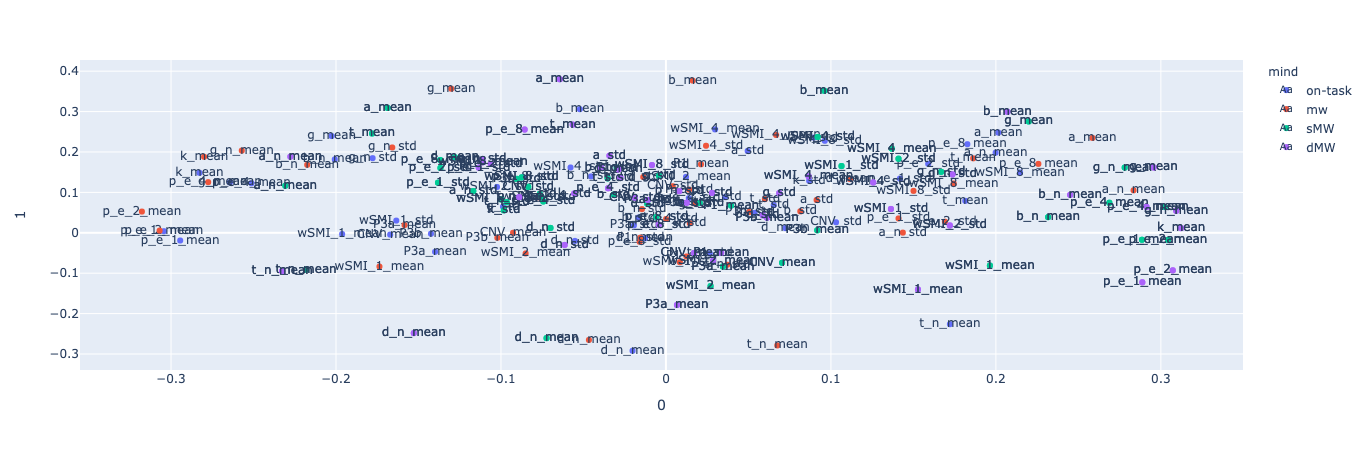

In [33]:
fig = px.scatter(mind_components, x=0, y=1, color="mind", text = 'index')
fig.show()


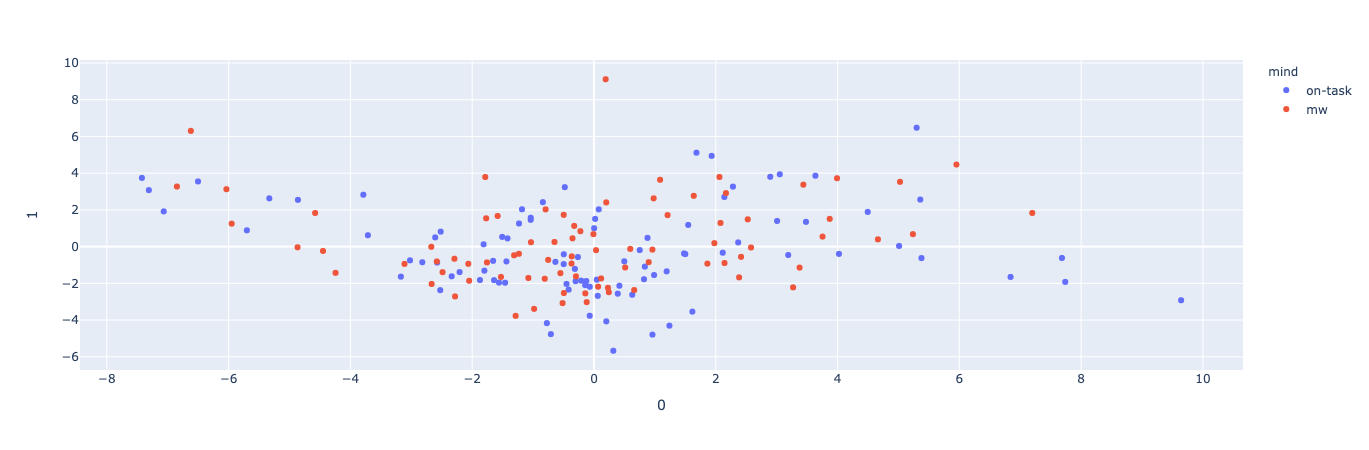

In [67]:
fig = px.scatter(X_pca, x=0, y=1, color="mind")
# fig = px.scatter_3d(X_pca, x=0, y=1,z=2, color="mind")
fig.show()

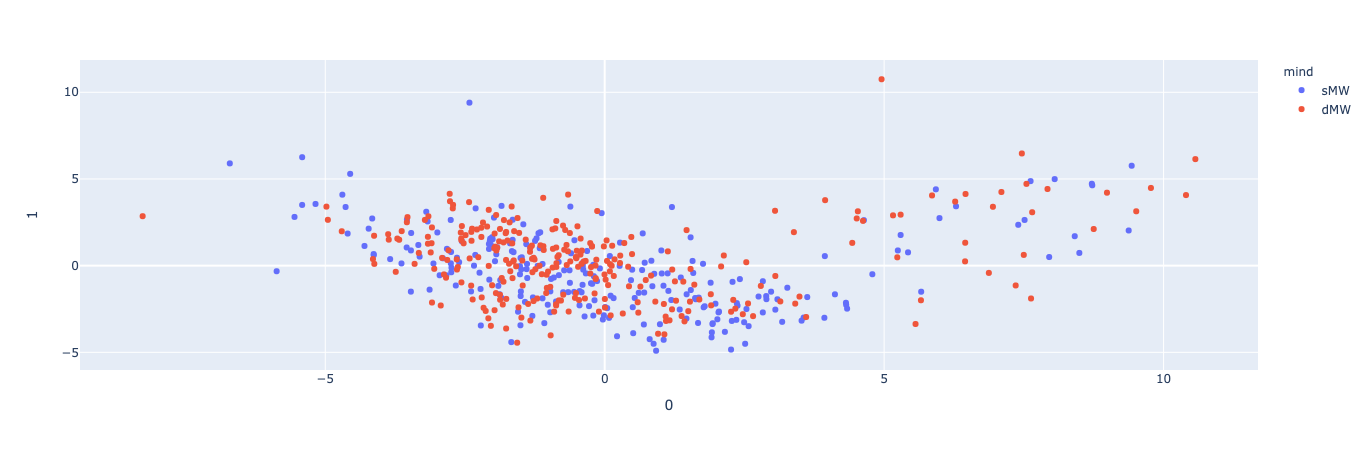

In [68]:
fig = px.scatter(X_pca_mw, x=0, y=1, color="mind")
# fig = px.scatter_3d(X_pca_mw, x=0, y=1,z=2, color="mind")
fig.show()